## Tutors - expected math exam results

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nataly\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# input
TRAIN_DATASET = 'train.csv'
TEST_DATASET = 'test.csv'

# output

SUBMISSION = 'NMoskovkina_submission1.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET)
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [4]:
TARGET_NAME = 'mean_exam_points'
BASE_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME, 'Id']).tolist()

X = df_train[BASE_FEATURE_NAMES].values
y = df_train[TARGET_NAME].values

In [5]:
df_train.shape

(10000, 12)

In [6]:
df_train.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [8]:
df_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


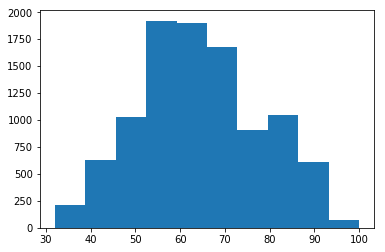

In [9]:
plt.hist(df_train['mean_exam_points']);

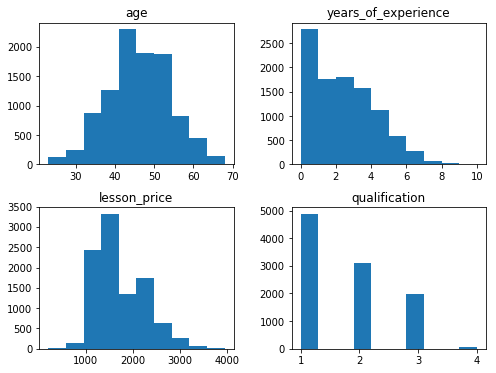

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.hist(df_train['age'])
ax1.set_title('age')

ax2.hist(df_train['years_of_experience'])
ax2.set_title('years_of_experience')

ax3.hist(df_train['lesson_price'])
ax3.set_title('lesson_price')

ax4.hist(df_train['qualification'])
ax4.set_title('qualification')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [11]:
def custom_minmaxScaler(x):
    res = (x - x.min()) / (x.max() - x.min())
    return res

In [12]:
df_norm = df_train.copy()

In [13]:
df_norm['age'] = custom_minmaxScaler(df_norm['age'])
df_norm['years_of_experience'] = custom_minmaxScaler(df_norm['years_of_experience'])
df_norm['lesson_price'] = custom_minmaxScaler(df_norm['lesson_price'])
df_norm['qualification'] = custom_minmaxScaler(df_norm['qualification'])

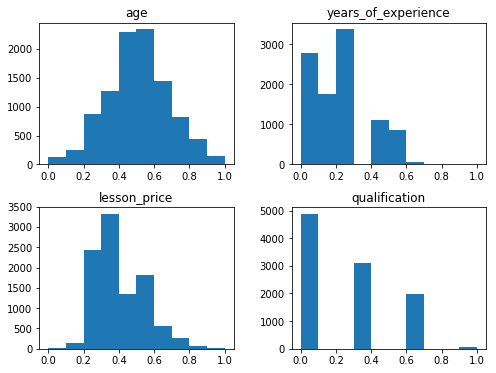

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.hist(df_norm['age'])
ax1.set_title('age')

ax2.hist(df_norm['years_of_experience'])
ax2.set_title('years_of_experience')

ax3.hist(df_norm['lesson_price'])
ax3.set_title('lesson_price')

ax4.hist(df_norm['qualification'])
ax4.set_title('qualification')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [15]:
X_norm = df_norm[BASE_FEATURE_NAMES].values

## Model

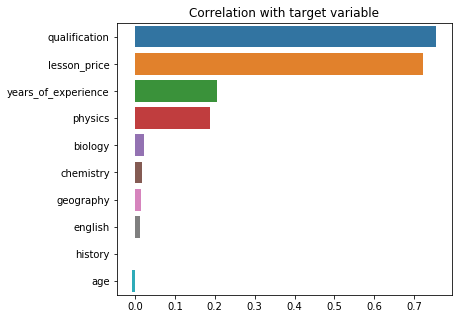

In [16]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(6, 5))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [17]:
def r_2(y, y_pred):
    return 1 - ((sum((y_pred - y)**2)) / (sum((y - np.mean(y))**2)))

In [18]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch

In [19]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        self.prediction_regression = self.predict_reg()
        
    def predict(self): 
        prediction = np.mean(self.labels)
        return prediction
    
    def predict_reg(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction 
    

In [20]:
class Tree:
    
    def __init__(self, max_depth=50):
        self.max_depth = max_depth
        self.tree = None
        
    def dispersion(self, labels):
        return np.std(labels)

    def quality_regression(self, left_labels, right_labels, current_dispersion):

        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0]) 

        return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    def split(self, data, labels, index, t):

        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels

    def find_best_split_regression(self, data, labels):

        min_leaf = 5

        current_dispersion = self.dispersion(labels)

        best_quality = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue

                current_quality = self.quality_regression(true_labels, false_labels, current_dispersion)

                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    def build_tree_regression(self, data, labels, tree_depth=1, max_depth=50):

        quality, t, index = self.find_best_split_regression(data, labels)

        if quality == 0:
            return Leaf(data, labels)

        if tree_depth >= max_depth:
            return Leaf(data, labels)

        tree_depth += 1

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        true_branch = self.build_tree_regression(true_data, true_labels, tree_depth, max_depth)
        false_branch = self.build_tree_regression(false_data, false_labels, tree_depth, max_depth)

        return Node(index, t, true_branch, false_branch)

    def predict_object(self,obj, node):

        if isinstance(node, Leaf):
            answer = node.prediction_regression
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)

    def predict(self, data):

        val = []

        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            val.append(prediction)

        return val

    def fit_tree(self, data, labels):

        self.tree = self.build_tree_regression(data, labels)

        return self

In [21]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [27]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list,coef_list)]) for x in X])

In [28]:
def deriv(y, z):
    return 2*(y - z)

In [29]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = Tree(max_depth=max_depth)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit_tree(X_train, y_train)
            
            train_errors.append(r_2(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(r_2(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            pred = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit_tree(X_train, deriv(y_train, pred))
            
            train_errors.append(r_2(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(r_2(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [72]:
n_trees = 20
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [74]:
%%time
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 1min 22s


In [79]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'The determination coefficient of an algorithm of {n_trees} trees with a depth of {max_depth} \
    in increments of {eta} on a training set: {r_2(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'The determination coefficient of an algorithm of {n_trees} trees with a depth of {max_depth} \
    in increments of  {eta} on a testing set: {r_2(y_test, test_prediction)}')

In [76]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Коэффициент детерминации алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 0.9063836006471864
Коэффициент детерминации из 20 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 0.7210634240817151


In [77]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('R^2')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

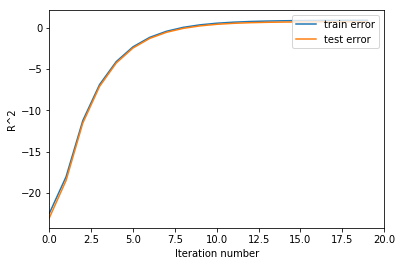

In [78]:
get_error_plot(n_trees, train_errors, test_errors)

### Prediction

In [84]:
df_test = pd.read_csv(TEST_DATASET)

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [85]:
df_test_norm = df_test.copy()

In [86]:
df_test_norm['age'] = custom_minmaxScaler(df_test_norm['age'])
df_test_norm['years_of_experience'] = custom_minmaxScaler(df_test_norm['years_of_experience'])
df_test_norm['lesson_price'] = custom_minmaxScaler(df_test_norm['lesson_price'])
df_test_norm['qualification'] = custom_minmaxScaler(df_test_norm['qualification'])

In [89]:
X_test = df_test_norm[BASE_FEATURE_NAMES].values

In [90]:
prediction = gb_predict(X_test, trees, coefs, eta)

In [91]:
sub = pd.concat([df_test['Id'], pd.Series(prediction)], axis=1)

In [92]:
sub = sub.rename(columns={0: 'mean_exam_points'})

In [93]:
sub.to_csv('NMoskovkina_prediction.csv',index=None)